In [26]:
#import libraries

import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 50000)
pd.set_option('display.max_rows',50000)
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
#inspect data
def inspect_data(df, col=None, n_rows=5):
    #check shape data
    print(f'data shape: {df.shape}')

    #define column
    if col is None:
        col = df.columns

    #check head data, use the display function to display the DataFrame
    display(df[col].head(n_rows))

In [3]:
#check missing data
def check_missing(df,cut_off=0, sort=True):
  freq:df.isnull().sum()
  percent=df.isnull().sum()/df.shape[0]*100
  types=df.types
  unique= df.apply(pd.unique).to_frame(name='Unique Values') ['Unique Values']
  df_miss= pd.DataFrame({'missing_percentage':percent,'missing_frequency':freq, 'types':types, 'unique_values':unique})
  if sort: df_miss_sort_values(by='missing_frequency', ascending=False, inplace= True)
  return df_miss[df_miss['missing_percentage'] >= cut_off]

In [1]:
#check missing values
def fillna_by_metric(df, column_name, metric='mean', custom_value=None):
    #Retrieve metric values according to input
    if metric == 'mean':
        metric_value = df[column_name].mean()
    elif metric == 'median':
        metric_value = df[column_name].median()
    elif metric == 'mode':
        metric_value = df[column_name].mode().iloc[0]
    elif metric == 'zero':
        metric_value = 0
    elif metric == 'custom':
        metric_value = custom_value
    else:
        raise ValueError("Invalid metric type")

    #Fill the missing value in the column with the retrieved metric value
    df[column_name].fillna(value=metric_value, inplace=True)

    return df

In [7]:
#load data
df_pizzas = pd.read_csv('pizzas.csv')

In [8]:
#load data
df_orders = pd.read_csv('orders.csv')

In [9]:
#load data
df_order_details = pd.read_csv('order_details.csv')

In [10]:
#load data pizzas
df_pizzas = pd.read_csv('pizzas.csv')
inspect_data(df_pizzas, n_rows=10)

data shape: (96, 4)


,pizza_id,pizza_type_id,size,price
0,bbq_ckn_s,bbq_ckn,S,12.75
1,bbq_ckn_m,bbq_ckn,M,16.75
2,bbq_ckn_l,bbq_ckn,L,20.75
3,cali_ckn_s,cali_ckn,S,12.75
4,cali_ckn_m,cali_ckn,M,16.75
5,cali_ckn_l,cali_ckn,L,20.75
6,ckn_alfredo_s,ckn_alfredo,S,12.75
7,ckn_alfredo_m,ckn_alfredo,M,16.75
8,ckn_alfredo_l,ckn_alfredo,L,20.75
9,ckn_pesto_s,ckn_pesto,S,12.75


In [13]:
#check missing pizzas
missing_value = df_pizzas.isnull().sum()

#display the columns with missing values and their counts
missing_value = missing_value[missing_value> 0]
print(missing_value)

Series([], dtype: int64)


In [14]:
#load data order details
df_order_details = pd.read_csv('order_details.csv')
inspect_data(df_order_details, n_rows=10)

data shape: (48620, 4)


,order_details_id,order_id,pizza_id,quantity
0,1,1,hawaiian_m,1
1,2,2,classic_dlx_m,1
2,3,2,five_cheese_l,1
3,4,2,ital_supr_l,1
4,5,2,mexicana_m,1
5,6,2,thai_ckn_l,1
6,7,3,ital_supr_m,1
7,8,3,prsc_argla_l,1
8,9,4,ital_supr_m,1
9,10,5,ital_supr_m,1


In [15]:
#check missing value
missing_value = df_order_details.isnull().sum()

#display missing value
missing_value = missing_value[missing_value >0]
print(missing_value)

Series([], dtype: int64)


In [42]:
#load data orders
df_order_details = pd.read_csv('orders.csv')
inspect_data(df_orders, n_rows=10)

data shape: (21350, 3)


,order_id,date,time
0,1,2015-01-01,0
1,2,2015-01-01,0
2,3,2015-01-01,0
3,4,2015-01-01,0
4,5,2015-01-01,0
5,6,2015-01-01,0
6,7,2015-01-01,0
7,8,2015-01-01,0
8,9,2015-01-01,0
9,10,2015-01-01,0


In [17]:
#check missing value
missing_value = df_orders.isnull().sum()

#display missing value
missing_value = missing_value[missing_value >0]
print(missing_value)

Series([], dtype: int64)


In [18]:
#check duplicate pizzas
df_pizzas[df_pizzas.duplicated()]

,pizza_id,pizza_type_id,size,price


In [19]:
#check duplicate orders
df_orders[df_orders.duplicated()]

,order_id,date,time


In [22]:
#check duplicate order details
df_order_details[df_order_details.duplicated()]

,order_details_id,order_id,pizza_id,quantity


In [24]:
#data analysis

#how many orders do we get every month? which months have the highest sales?

#read data from  orders table
df_orders = pd.read_csv('orders.csv')

#convert a date column to datetime data type
df_orders['date'] = pd.to_datetime(df_orders['date'])

#create a new column with year-month date format (YYYY-mm)
df_orders['tahun-bulan'] = df_orders['date'].dt.strftime('%Y-%m')

#count the number of order_ids by year-month
summary = df_orders['order_id'].groupby(df_orders['tahun-bulan']).count()

<Axes: xlabel='tahun-bulan'>

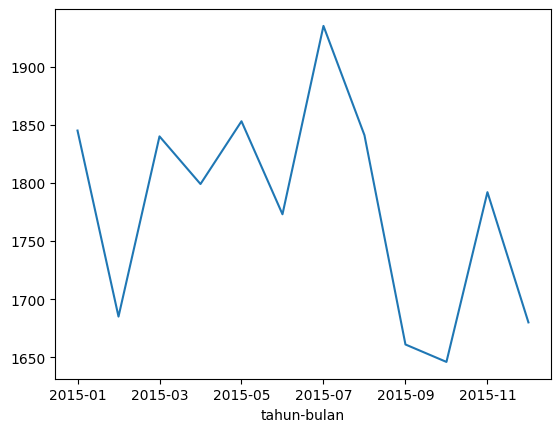

In [27]:
#create a line chart using summary data
summary.plot(kind='line')
plt.xlabel('Month')
plt.ylabel('Number of orders')
plt.title('Total Orders by Month')
plt.show()

#search for the summary of the month with the highest order
ringkasan_pesanan_tertinggi = summary.idxmax()
print("Bulan dengan pesanan tertinggi: ", ringkasan_pesanan_tertinggi)


<ipython-input-46-b3a9e91a7de1>:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_orders['date'] = pd.to_datetime(df_orders['time'])


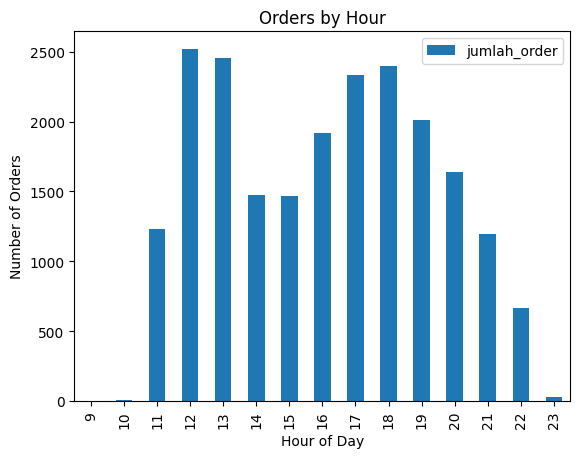

In [46]:
#are there peak hours?

# read data from orders tabel to Pandas DataFrame
df_orders = pd.read_csv('orders.csv')

# convert date column to datetime data type
df_orders['date'] = pd.to_datetime(df_orders['time'])

# extract hour from date column
df_orders['time'] = df_orders['date'].dt.hour

# calculate the number of order per hours
summary = df_orders.groupby('time').size().reset_index(name='jumlah_order')

# sort data based on number of orders and time
summary = summary.sort_values('time')

summary.plot(x='time', y='jumlah_order', kind='bar')

plt.xlabel('Hour of Day')
plt.ylabel('Number of Orders')
plt.title('Orders by Hour')

plt.show()


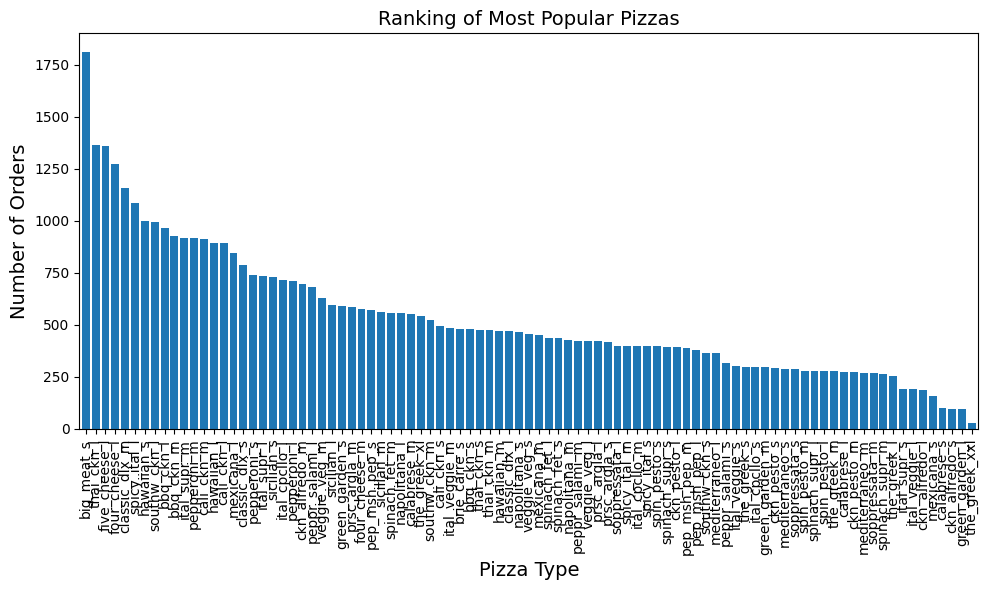

In [45]:
#what is the most ordered pizza? compare the number of orders for each type of pizza

#read data from pizzas table
df_order_details = pd.read_csv('order_details.csv')

#calculate the total order for each pizza size
pizza_counts = df_order_details['pizza_id'].value_counts()

# sort data based on number of reviews and time
summary = summary.sort_values('time')

#create a bar plot using pizza counts
plt.figure(figsize=(10,6)) #set image size

pizza_counts.plot(kind='bar', width=0.8)

plt.xlabel('Pizza Type', fontsize=14)
plt.ylabel('Number of Orders', fontsize=14)
plt.title('Ranking of Most Popular Pizzas', fontsize=14)

#set x-axis label rotation
plt.xticks(rotation=90)

plt.xticks(ticks=range(len(pizza_counts.index)), labels=pizza_counts.index)

#so as not to overlap on the label
plt.tight_layout()

plt.show()


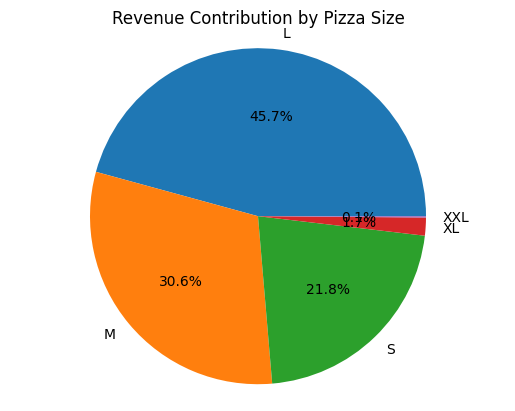

In [47]:
#how does each pizza size contribute to revenue?

#read data from pizza table
df_pizzas = pd.read_csv('pizzas.csv')

#calculate the total revenue for each pizza size
merged_df = pd.merge(df_order_details, df_pizzas, on='pizza_id')
merged_df['revenue'] = merged_df['quantity'] * merged_df['price']
pizza_revenue = merged_df.groupby('size')['price'].sum().reset_index()

total_revenue = pizza_revenue['price'].sum()

pizza_revenue['percentage'] = pizza_revenue['price']/total_revenue * 100

#create a pie chart using pizza revenue data

fig, ax = plt.subplots()
ax.pie(pizza_revenue['percentage'], labels=pizza_revenue['size'], autopct='%1.1f%%')

plt.axis('equal')
plt.title ('Revenue Contribution by Pizza Size')

plt.show()



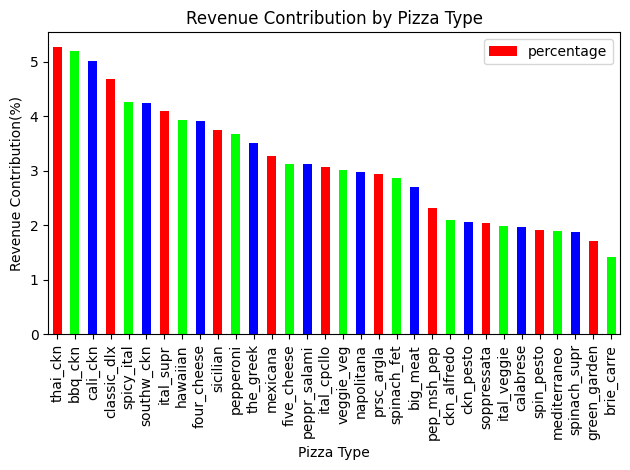

In [48]:
#what is the revenue contribution for each pizza type?

#read data from pizza table
df_pizzas = pd.read_csv('pizzas.csv')

#calculate the total revenue for each pizza size
merged_df = pd.merge(df_order_details, df_pizzas, on='pizza_id')
merged_df['revenue'] = merged_df['quantity'] * merged_df['price']
pizza_revenue = merged_df.groupby('pizza_type_id')['price'].sum().reset_index()

total_revenue = pizza_revenue['price'].sum()

pizza_revenue['percentage'] = pizza_revenue['price']/total_revenue * 100

#sort dat based on highest contribution
pizza_revenue = pizza_revenue.sort_values('percentage', ascending=False)

#create a bar plot using pizza counts
pizza_revenue.plot(x='pizza_type_id', y='percentage', kind='bar', color=['#FF0000', '#00FF00', '#0000FF'])

plt.xlabel('Pizza Type')
plt.ylabel('Revenue Contribution(%)')
plt.title('Revenue Contribution by Pizza Type')

plt.tight_layout()

plt.show()